<a href="https://colab.research.google.com/github/KenDaupsey/-Correlation-analysis-Using-Python/blob/main/Correlation_analysis_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*** Correlation analysis Using Python ***

In [1]:
### Import Necessary Libraries

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
### Load Dataset and Examine First 5 Rows
url= "https://raw.githubusercontent.com/KenDaupsey/-Correlation-analysis-Using-Python/main/hsb2%7Edata.csv"
df = pd.read_csv(url)
df.head()

,id,female,race,ses,schtyp,prog,read,write,math,science,socst
0,70,male,white,low,public,general,57,52,41,47,57
1,121,female,white,middle,public,vocation,68,59,53,63,61
2,86,male,white,high,public,general,44,33,54,58,31
3,141,male,white,high,public,vocation,63,44,47,53,56
4,172,male,white,middle,public,academic,47,52,57,53,61


In [3]:
df.columns

Index(['id', 'female', 'race', 'ses', 'schtyp', 'prog', 'read', 'write',
       'math', 'science', 'socst'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       200 non-null    int64 
 1   female   200 non-null    object
 2   race     200 non-null    object
 3   ses      200 non-null    object
 4   schtyp   200 non-null    object
 5   prog     200 non-null    object
 6   read     200 non-null    int64 
 7   write    200 non-null    int64 
 8   math     200 non-null    int64 
 9   science  200 non-null    int64 
 10  socst    200 non-null    int64 
dtypes: int64(6), object(5)
memory usage: 17.3+ KB


*** Pearson’s Correlation ***

In [5]:
### Pearson’s Correlation
df[['read','write', 'math', 'socst']].corr()

,read,write,math,socst
read,1.000000,0.596776,0.662280,0.621484
write,0.596776,1.000000,0.617449,0.604793
math,0.662280,0.617449,1.000000,0.544480
socst,0.621484,0.604793,0.544480,1.000000


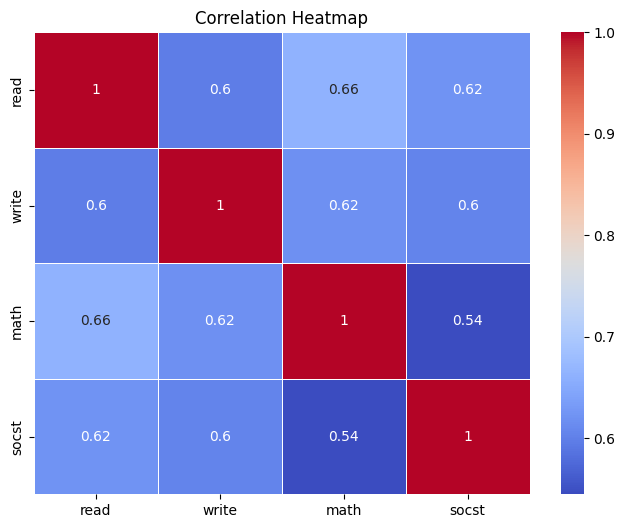

In [6]:
### Correlation Analysis with Seaborn Visualization
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Select the columns for correlation
correlation_columns = ['read', 'write', 'math', 'socst']

# Calculate the correlation matrix
correlation_matrix = df[correlation_columns].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

*** Non-parametric correlation (Spearman’s correlation) ***

Spearman Correlation Matrix:
           read     write      math     socst
read   1.000000  0.616745  0.663126  0.633171
write  0.616745  1.000000  0.643944  0.592279
math   0.663126  0.643944  1.000000  0.541440
socst  0.633171  0.592279  0.541440  1.000000


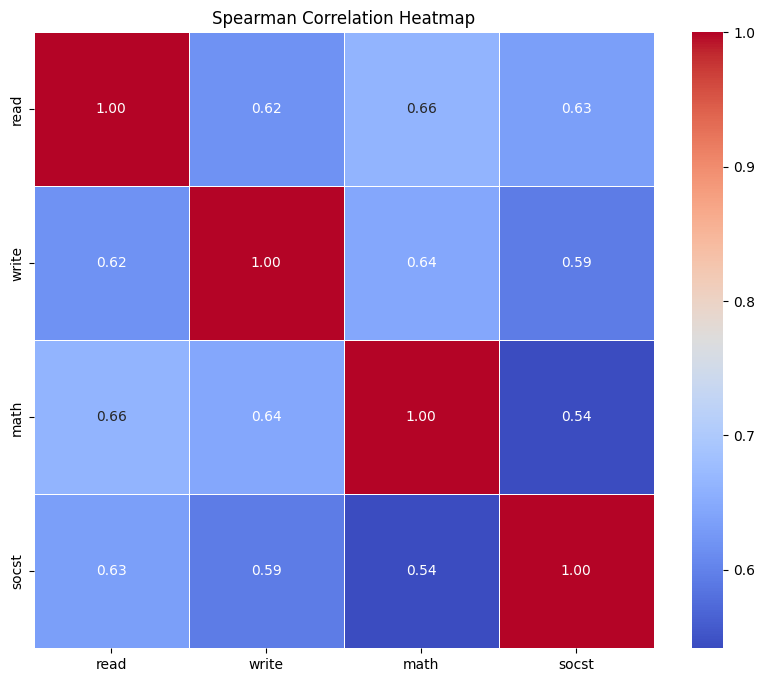

In [7]:
### Non-parametric correlation (Spearman’s correlation)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with continuous variables
# Select only the continuous variables
continuous_vars = df[['read', 'write', 'math', 'socst']]

# Calculate the Spearman correlation matrix
spearman_corr_matrix = continuous_vars.corr(method='spearman')

# Print the Spearman correlation matrix
print("Spearman Correlation Matrix:")
print(spearman_corr_matrix)

# Visualize the Spearman correlation matrix using a heatmap with Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Spearman Correlation Heatmap')
plt.show()

*** Gamma, Kendal Tau B, Kendall Tau C ***

In [8]:
### Converting Continuous Variables to Ordinal for Gamma Analysis
# import pandas as pd

# Assuming df is your DataFrame with continuous variables
# Select only the continuous variables
continuous_vars = df[['read', 'write', 'math', 'socst']]

# Convert continuous variables to ordinal variables with 5 categories
ordinal_vars = pd.DataFrame()
for col in continuous_vars.columns:
    ordinal_vars[col + '_ordinal'] = pd.qcut(continuous_vars[col], q=5, labels=False)

# Concatenate the ordinal variables with the original DataFrame
df_gamma = pd.concat([df, ordinal_vars], axis=1)

# Display the updated DataFrame
print("DataFrame with Ordinal Variables:")
print(df_gamma.head())

DataFrame with Ordinal Variables:
    id  female   race     ses  schtyp      prog  read  write  math  science  \
0   70    male  white     low  public   general    57     52    41       47   
1  121  female  white  middle  public  vocation    68     59    53       63   
2   86    male  white    high  public   general    44     33    54       58   
3  141    male  white    high  public  vocation    63     44    47       53   
4  172    male  white  middle  public  academic    47     52    57       53   

   socst  read_ordinal  write_ordinal  math_ordinal  socst_ordinal  
0     57             3              1             0              3  
1     61             4              3             2              3  
2     31             0              0             2              0  
3     56             3              0             1              2  
4     61             1              1             3              3  


In [9]:
### Ecaminining the new columns
df_gamma.columns

Index(['id', 'female', 'race', 'ses', 'schtyp', 'prog', 'read', 'write',
       'math', 'science', 'socst', 'read_ordinal', 'write_ordinal',
       'math_ordinal', 'socst_ordinal'],
      dtype='object')

In [10]:
### Examining the distribution of new variable "math_ordinal"
df_gamma['math_ordinal'].value_counts()

2    43
0    42
3    40
1    38
4    37
Name: math_ordinal, dtype: int64

In [11]:
### Gamma (association test-ordinal variables 1)
### GAMMA TEST
import scipy.stats

# Assuming df_gamma is your DataFrame
read_ordinal = df_gamma['read_ordinal']
write_ordinal = df_gamma['write_ordinal']

# Gamma Test
gamma_result = scipy.stats.somersd(read_ordinal, write_ordinal)
gamma_stat = gamma_result.statistic
gamma_p_value = gamma_result.pvalue
print(f"Gamma Test - read_ordinal vs write_ordinal: Statistic = {gamma_stat}, p-value = {gamma_p_value:.4f}")

Gamma Test - read_ordinal vs write_ordinal: Statistic = 0.4994302355026589, p-value = 0.0000


*** Kendal Tau-B (association test-ordinal variables 2) ***

In [12]:
### Kendal Tau-B (association test-ordinal variables 2)
import scipy.stats

# Assuming df_gamma is your DataFrame
read_ordinal = df_gamma['read_ordinal']
write_ordinal = df_gamma['write_ordinal']

# Kendall Tau-B Test
kendall_tau_b_result = scipy.stats.kendalltau(read_ordinal, write_ordinal, variant='b')
kendall_tau_b_stat = kendall_tau_b_result.correlation
kendall_tau_b_p_value = kendall_tau_b_result.pvalue
print(f"Kendall Tau-B Test - read_ordinal vs write_ordinal: Statistic = {kendall_tau_b_stat}, p-value = {kendall_tau_b_p_value:.4f}")

Kendall Tau-B Test - read_ordinal vs write_ordinal: Statistic = 0.49952511507204905, p-value = 0.0000


In [13]:
### Kendal Tau-C (association test-ordinal variables 3):
import scipy.stats

# Assuming df_gamma is your DataFrame
read_ordinal = df_gamma['read_ordinal']
write_ordinal = df_gamma['write_ordinal']

kendall_tau_c_result = scipy.stats.kendalltau(read_ordinal, write_ordinal, variant='c')
kendall_tau_c_stat = kendall_tau_c_result.correlation
kendall_tau_c_p_value = kendall_tau_c_result.pvalue
print(f"Kendall Tau-C Test - read_ordinal vs write_ordinal: Statistic = {kendall_tau_c_stat}, p-value = {kendall_tau_c_p_value:.4f}")

Kendall Tau-C Test - read_ordinal vs write_ordinal: Statistic = 0.4930625, p-value = 0.0000


In [14]:
### Ordinal Correlation Analysis for Gamma, Kendall Tau-B, and Kendall Tau-C Tests

import scipy.stats

# Assuming df_gamma is your DataFrame
read_ordinal = df_gamma['read_ordinal']
write_ordinal = df_gamma['write_ordinal']

# Gamma Test
gamma_result = scipy.stats.somersd(read_ordinal, write_ordinal)
gamma_stat = gamma_result.statistic
gamma_p_value = gamma_result.pvalue
print(f"Gamma Test - read_ordinal vs write_ordinal: Statistic = {gamma_stat}, p-value = {gamma_p_value:.4f}")

# Kendall Tau-B Test
kendall_tau_b_result = scipy.stats.kendalltau(read_ordinal, write_ordinal, variant='b')
kendall_tau_b_stat = kendall_tau_b_result.correlation
kendall_tau_b_p_value = kendall_tau_b_result.pvalue
print(f"Kendall Tau-B Test - read_ordinal vs write_ordinal: Statistic = {kendall_tau_b_stat}, p-value = {kendall_tau_b_p_value:.4f}")

# Kendall Tau-C Test
kendall_tau_c_result = scipy.stats.kendalltau(read_ordinal, write_ordinal, variant='c')
kendall_tau_c_stat = kendall_tau_c_result.correlation
kendall_tau_c_p_value = kendall_tau_c_result.pvalue
print(f"Kendall Tau-C Test - read_ordinal vs write_ordinal: Statistic = {kendall_tau_c_stat}, p-value = {kendall_tau_c_p_value:.4f}")

Gamma Test - read_ordinal vs write_ordinal: Statistic = 0.4994302355026589, p-value = 0.0000
Kendall Tau-B Test - read_ordinal vs write_ordinal: Statistic = 0.49952511507204905, p-value = 0.0000
Kendall Tau-C Test - read_ordinal vs write_ordinal: Statistic = 0.4930625, p-value = 0.0000


*** Canonical correlation ***

In [15]:
### Converting Categorical Variables to Numeric Representation

# Assume variables specified properly
### CONVERT "female" Variable LABELS TO NUMERIC 0 AND 1

# Assuming df is your DataFrame
df['female_numeric'] = df['female'].map({'male': 0, 'female': 1})

# Display the updated DataFrame
print(df[['female', 'female_numeric']])

from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame
label_encoder = LabelEncoder()

# Convert "race" to numeric
df['race_numeric'] = label_encoder.fit_transform(df['race'])

# Convert "ses" to numeric
df['ses_numeric'] = label_encoder.fit_transform(df['ses'])

# Convert "schtyp" to numeric
df['schtyp_numeric'] = label_encoder.fit_transform(df['schtyp'])

# Convert "prog" to numeric
df['prog_numeric'] = label_encoder.fit_transform(df['prog'])

# Display the updated DataFrame
print(df[['race', 'race_numeric', 'ses', 'ses_numeric', 'schtyp', 'schtyp_numeric', 'prog', 'prog_numeric']])

df.columns

     female  female_numeric
0      male               0
1    female               1
2      male               0
3      male               0
4      male               0
..      ...             ...
195  female               1
196  female               1
197  female               1
198  female               1
199  female               1

[200 rows x 2 columns]
      race  race_numeric     ses  ses_numeric   schtyp  schtyp_numeric  \
0    white             3     low            1   public               1   
1    white             3  middle            2   public               1   
2    white             3    high            0   public               1   
3    white             3    high            0   public               1   
4    white             3  middle            2   public               1   
..     ...           ...     ...          ...      ...             ...   
195  asian             1  middle            2  private               0   
196  white             3  middle            2   

Index(['id', 'female', 'race', 'ses', 'schtyp', 'prog', 'read', 'write',
       'math', 'science', 'socst', 'female_numeric', 'race_numeric',
       'ses_numeric', 'schtyp_numeric', 'prog_numeric'],
      dtype='object')

In [18]:
#### Canonical Procedure Implementation

import pandas as pd
from sklearn.cross_decomposition import CCA

# Define input features
X_cols = ['read', 'write', 'math', 'science', 'socst']
Y_cols = ['female_numeric', 'ses_numeric', 'schtyp_numeric', 'prog_numeric', 'race_numeric']

# Fit on NumPy arrays to avoid column name issues
X_arr = df[X_cols].to_numpy()
Y_arr = df[Y_cols].to_numpy()

# Suppress warning about feature names
import warnings
warnings.filterwarnings("ignore")

cca = CCA(n_components=2)
cca.fit(X_arr, Y_arr)

# Transform on DataFrames
X_transformed = cca.transform(df[X_cols])
Y_transformed = cca.transform(df[Y_cols])

# Print transformed data
print(pd.DataFrame(X_transformed, columns=['X_Comp1', 'X_Comp2']))
print(pd.DataFrame(Y_transformed, columns=['Y_Comp1', 'Y_Comp2']))

      X_Comp1   X_Comp2
0   -0.320094 -0.324905
1    0.709838  0.685103
2   -2.380089  1.938792
3   -0.560489  1.043952
4    0.455705  0.140223
..        ...       ...
195  0.851103 -1.218141
196 -1.271249 -1.049629
197 -0.477775  1.442183
198  1.114206 -0.177266
199  2.025222 -0.542836

[200 rows x 2 columns]
      Y_Comp1   Y_Comp2
0   -7.781055 -1.350749
1   -7.733230 -1.341918
2   -7.841754 -1.262270
3   -7.872954 -1.187314
4   -7.689155 -1.514185
..        ...       ...
195 -7.848852 -1.440510
196 -7.733230 -1.341918
197 -7.762931 -1.430564
198 -7.702029 -1.416875
199 -7.792228 -1.314874

[200 rows x 2 columns]


*** Canonical Correlation with three Components ***

In [17]:
### Canonical Correlation with three Components

from sklearn.cross_decomposition import CCA
import pandas as pd

# Assuming your data is stored in a DataFrame called df
# Selecting the variables for canonical correlation analysis
X = df[['read', 'write', 'math', 'science']]
Y = df[['ses_numeric', 'socst', 'race_numeric']]

# Instantiating the CCA object and fitting the model
cca = CCA(n_components=3)
cca.fit(X, Y)

# Transforming the original variables to canonical variables
X_c, Y_c = cca.transform(X, Y)

# Printing the shapes of the canonical variables
n_components = cca.n_components
print("Canonical Variables for X:")
print(pd.DataFrame(X_c, columns=[f'Canonical_Component_{i+1}' for i in range(n_components)]))

print("\nCanonical Variables for Y:")
print(pd.DataFrame(Y_c, columns=[f'Canonical_Component_{i+1}' for i in range(n_components)]))

# Added Function to Increase Size of Visible Output
pd.set_option('display.max_rows', 20)  # Set the maximum number of rows to 20
pd.set_option('display.max_columns', 10)  # Set the maximum number of columns to 1

Canonical Variables for X:
     Canonical_Component_1  Canonical_Component_2  Canonical_Component_3
0                -0.034244              -0.303142              -0.032505
1                 1.696570               0.450975              -0.179496
2                -1.789401               1.594899              -0.939802
3                 0.084785               0.387132              -1.049609
4                -0.314576               0.166763               0.111117
..                     ...                    ...                    ...
195               0.472505              -1.244882               0.114401
196              -1.719206              -0.717020               0.215943
197              -0.291813               0.644804              -1.240522
198               1.007431               0.014918               0.494422
199               1.881300              -0.874606              -0.086723

[200 rows x 3 columns]

Canonical Variables for Y:
     Canonical_Component_1  Canonical_Compone

*** The End ***